[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\Marcelo DL\Desktop\VSCode\Data Science\Estatística\estat_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Marcelo DL\Desktop\VSCode\Data Science\Estatística\estat_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Marcelo DL\Desktop\VSCode\Data Science\Estatística\estat_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.


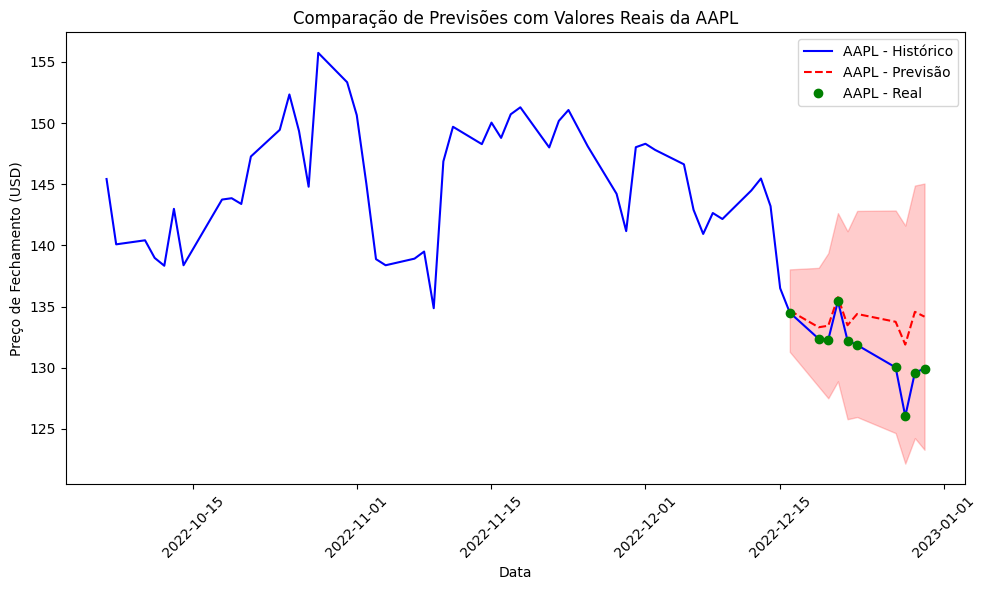

In [6]:
import yfinance as yf
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Baixando dados de fechamento das ações da Apple (AAPL) e do índice S&P 500 (GSPC) do Yahoo Finance
dados_aapl = yf.download('AAPL', start='2020-01-01', end='2023-01-01')['Close']
dados_sp500 = yf.download('^GSPC', start='2020-01-01', end='2023-01-01')['Close']

# Criando um DataFrame para combinar os dados da AAPL e do S&P 500, alinhando os índices de data e removendo dias sem dados
dados = pd.DataFrame({'AAPL': dados_aapl, 'SP500': dados_sp500}).dropna()

# Definindo as variáveis endógenas (y) e exógenas (X)
X = dados[['SP500']]  # SP500 como variável exógena
y = dados['AAPL']  # Preço de fechamento da AAPL como variável endógena

# Para simular a previsão contra valores reais, vamos ajustar o modelo até 10 dias antes do final dos dados
X_train = X.iloc[:-10]
y_train = y.iloc[:-10]

# Ajustando o modelo ARIMA(1,1,1) com a variável exógena SP500 até a data de corte
modelo_arimax = ARIMA(y_train, order=(1,1,1), exog=X_train)
resultado_arimax = modelo_arimax.fit()

# Realizando previsões para os últimos 10 dias usando os dados até a data de corte
X_test = X.iloc[-10:]  # Variáveis exógenas para o período de previsão
previsoes = resultado_arimax.get_forecast(steps=10, exog=X_test)
intervalo_confianca = previsoes.conf_int()

# Visualização dos resultados
plt.figure(figsize=(10, 6))

# Plotando os dados históricos
plt.plot(y.iloc[-60:], label='AAPL - Histórico', color='blue')

# Plotando as previsões para os últimos 10 dias contra os dados reais
datas_previsao = y.index[-10:]
plt.plot(datas_previsao, previsoes.predicted_mean, label='AAPL - Previsão', color='red', linestyle='--')
plt.fill_between(datas_previsao, 
                 intervalo_confianca.iloc[:, 0], 
                 intervalo_confianca.iloc[:, 1], 
                 color='red', alpha=0.2)

# Plotando os valores reais para o período de previsão
plt.plot(y.iloc[-10:], label='AAPL - Real', color='green', marker='o', linestyle='')

# Adicionando detalhes ao gráfico
plt.title('Comparação de Previsões com Valores Reais da AAPL')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento (USD)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [7]:
# 4 Variáveis exogenas

[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
c:\Users\Marcelo DL\Desktop\VSCode\Data Science\Estatística\estat_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Marcelo DL\Desktop\VSCode\Data Science\Estatística\estat_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Marcelo DL\Desktop\VSCode\Data Science\Estatística\estat_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: 

                               SARIMAX Results                                
Dep. Variable:                   AAPL   No. Observations:                  746
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1259.170
Date:                Wed, 28 Feb 2024   AIC                           2532.341
Time:                        20:12:33   BIC                           2564.634
Sample:                             0   HQIC                          2544.788
                                - 746                                         
Covariance Type:                  opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Volume       2.621e-09   9.32e-10      2.813      0.005    7.95e-10    4.45e-09
Max             0.3418      0.009     39.130      0.000       0.325       0.359
Min             0.1923      0.011     17.428    

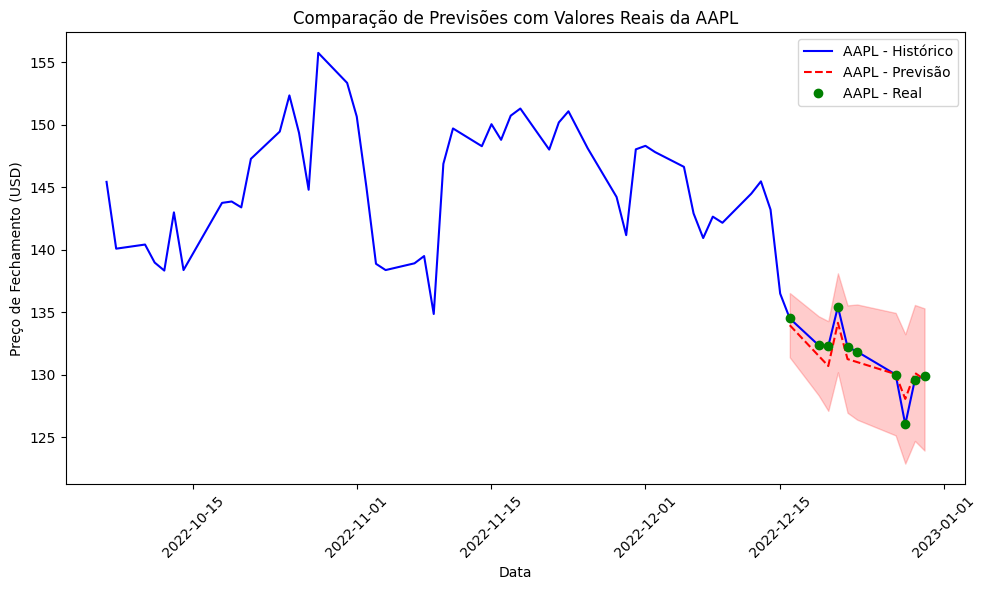

In [9]:
import yfinance as yf
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Baixando dados de fechamento, volume, máximo e mínimo das ações da Apple (AAPL) 
# e do preço de fechamento do índice S&P 500 (GSPC) do Yahoo Finance
dados_aapl = yf.download('AAPL', start='2020-01-01', end='2023-01-01')
dados_volume = yf.download('AAPL', start='2020-01-01', end='2023-01-01')['Volume']
dados_max = yf.download('AAPL', start='2020-01-01', end='2023-01-01')['High']
dados_min = yf.download('AAPL', start='2020-01-01', end='2023-01-01')['Low']
dados_sp500_close = yf.download('^GSPC', start='2020-01-01', end='2023-01-01')['Close']

# Criando um DataFrame para combinar os dados
dados = pd.DataFrame({'AAPL': dados_aapl['Close'], 
                      'Volume': dados_volume, 
                      'Max': dados_max,
                      'Min': dados_min,
                      'SP500_Close': dados_sp500_close}).dropna()

# Definindo as variáveis endógenas (y) e exógenas (X)
X = dados[['Volume', 'Max', 'Min', 'SP500_Close']]  # Variáveis exógenas
y = dados['AAPL']  # Variável endógena

# Para simular a previsão contra valores reais, vamos ajustar o modelo até 10 dias antes do final dos dados
X_train = X.iloc[:-10]
y_train = y.iloc[:-10]

# Ajustando o modelo ARIMA(1,1,1) com as variáveis exógenas Volume, Max, Min e SP500_Close até a data de corte
modelo_arimax = ARIMA(y_train, order=(1,1,1), exog=X_train)
resultado_arimax = modelo_arimax.fit()

# Resumo do modelo
print(resultado_arimax.summary())

# Realizando previsões para os últimos 10 dias usando os dados até a data de corte
X_test = X.iloc[-10:]  # Variáveis exógenas para o período de previsão
previsoes = resultado_arimax.get_forecast(steps=10, exog=X_test)
intervalo_confianca = previsoes.conf_int()

# Visualização dos resultados
plt.figure(figsize=(10, 6))

# Plotando os dados históricos
plt.plot(y.iloc[-60:], label='AAPL - Histórico', color='blue')

# Plotando as previsões para os últimos 10 dias contra os dados reais
datas_previsao = y.index[-10:]
plt.plot(datas_previsao, previsoes.predicted_mean, label='AAPL - Previsão', color='red', linestyle='--')
plt.fill_between(datas_previsao, 
                 intervalo_confianca.iloc[:, 0], 
                 intervalo_confianca.iloc[:, 1], 
                 color='red', alpha=0.2)

# Plotando os valores reais para o período de previsão
plt.plot(y.iloc[-10:], label='AAPL - Real', color='green', marker='o', linestyle='')

# Adicionando detalhes ao gráfico
plt.title('Comparação de Previsões com Valores Reais da AAPL')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento (USD)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
